In [4]:
import numpy as np
from scipy.stats import norm, halfnorm
from scipy.stats import multivariate_normal


import matplotlib.pyplot as plt

/tmp/ipykernel_5618/2223421796.py:29: UserWarning: The following kwargs were not used by contour: 'label'
  ax_meta.contour(X, Y, Z, colors="k", linewidths=np.linspace(0.2,1.5,c_levels), linestyles='-', levels=c_levels, label='prior')


[-0.25, 0.25] tab:orange
[0.5, 1.1] tab:green


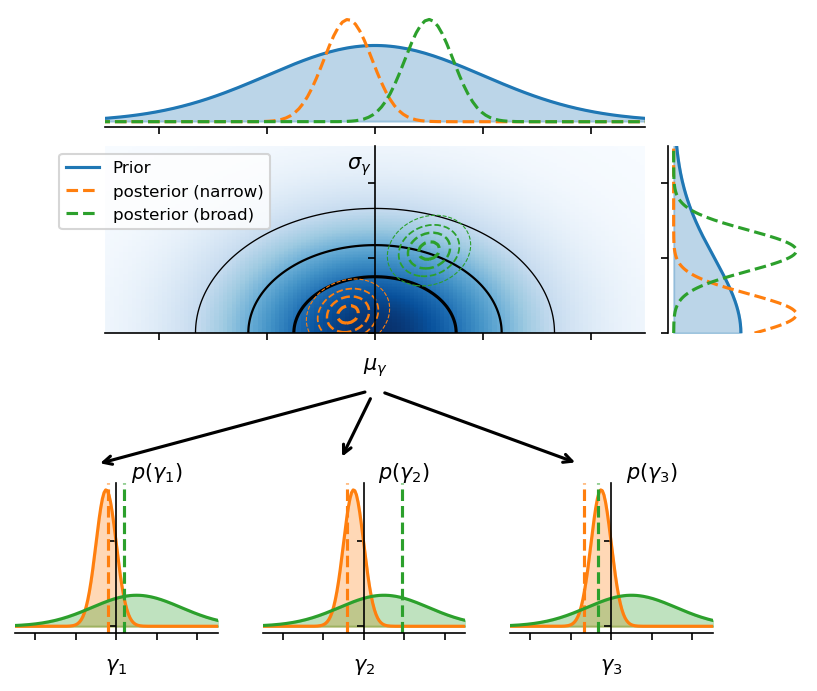

In [5]:
from matplotlib.lines import Line2D

# Parameters
mu_gauss = 0  # mean of Gaussian
sigma_gauss = 1  # std dev of Gaussian
scale_halfnormal = 1.0  # scale of Half-Normal

n_steps = 200
c_levels = 4

n_sd = 4
# Grid for plotting
x = np.linspace(mu_gauss - n_sd * sigma_gauss, mu_gauss + n_sd * sigma_gauss, n_steps)
y = np.linspace(0, n_sd * scale_halfnormal, n_steps)
X, Y = np.meshgrid(x, y)

# Joint probability density
Z = norm.pdf(X, loc=mu_gauss, scale=sigma_gauss) * halfnorm.pdf(
    Y, loc=0, scale=scale_halfnormal
)

# Normalize Z for alpha mapping
Z_norm = Z / Z.max()

fig = plt.figure(figsize=(6, 5), dpi=150)
ax_meta = fig.add_axes([0.2, 0.5, 0.6, 0.25])
# ax_cb = fig.add_axes([0.225, 0.575, 0.025, 0.15])
ax_meta.pcolormesh(X, Y, Z, shading="auto", cmap="Blues")
ax_meta.contour(X, Y, Z, colors="k", linewidths=np.linspace(0.2,1.5,c_levels), linestyles='-', levels=c_levels, label='prior')

proxy = Line2D([0], [0], color="tab:blue", linestyle='-', label=f'Prior')
ax_meta.add_line(proxy)

ax_norm = fig.add_axes([0.2, 0.775, 0.6, 0.15], sharex=ax_meta)
ax_halfnorm = fig.add_axes([0.825, 0.5, 0.15, 0.25], sharey=ax_meta)

halfnorm_density = halfnorm.pdf(y, loc=0, scale=scale_halfnormal)
ax_halfnorm.plot(halfnorm_density, y, "-", color="tab:blue")
ax_halfnorm.fill_betweenx(y, 0, halfnorm_density, color="tab:blue", alpha=0.3)

norm_density = norm.pdf(x, loc=mu_gauss, scale=sigma_gauss)
ax_norm.plot(x, norm_density, "-", color="tab:blue")
ax_norm.fill_between(x, 0, norm_density, color="tab:blue", alpha=0.3)

plt.setp(
    ax_meta,
    xlabel="$\mu_{\gamma}$",
    ylabel="$\sigma_{\gamma}$",
    # title="Joint PDF: Gaussian (x) & Half-Normal (y)",
    yticklabels=[],
    xlim=(-2.5 * sigma_gauss, 2.5 * sigma_gauss),
    ylim=(0, 2.5 * scale_halfnormal),
)
plt.setp(ax_meta.yaxis.label, va="top", rotation=0)

ax_meta.spines["left"].set_position("center")
ax_meta.yaxis.set_label_coords(0.47, 0.95)
ax_meta.spines[["top", "right"]].set_visible(False)

plt.setp(ax_halfnorm, xticks=[])  # , yticklabels=[])
ax_halfnorm.spines[["top", "right", "bottom"]].set_visible(False)

plt.setp(ax_norm, xticklabels=[], yticks=[])
ax_norm.spines[["top", "right", "left"]].set_visible(False)

# fig.colorbar(plt.cm.ScalarMappable(cmap="Blues"), cax=ax_cb,label='prior density')
# # Move colorbar ticks and label to the left side
# ax_cb.yaxis.set_ticks_position("left")
# ax_cb.yaxis.set_label_position("left")


fig_w, fig_h = fig.get_size_inches()
# bbox_meta = ax_meta.get_position()
# center_x_meta = bbox_meta.x0 * fig_w * fig.dpi
# top_y_meta = bbox_meta.y0 * fig_h * fig.dpi

ax_samples = []
for i in range(3):
    ax = fig.add_axes([0.1 + 0.275 * i, 0.1, 0.225, 0.2], sharex=ax_norm)
    ax.spines[["top", "right"]].set_visible(False)
    ax.spines["left"].set_position("center")
    plt.setp(ax, yticklabels=[],xlabel=rf'$\gamma_{i+1}$',ylabel=rf'$p(\gamma_{i+1})$')
    plt.setp(ax.yaxis.label, va="top", rotation=0)
    ax.yaxis.set_label_coords(0.7, 1.15)


    # proxy = Line2D([0], [0], color="k", linestyle='--', label=rf'$\gamma_{i+1}$')
    # ax.add_line(proxy)
    # ax.legend(fontsize=8)

    ax_samples.append(ax)

    # Draw the arrow in figure coordinates
    
    # Get the display coordinates of the center-top of the added axis
    # print(fig_w, fig_h, fig.dpi)
    # center_x = (bbox.x0 + bbox.x1) / 2 * fig_w * fig.dpi
    bbox = ax_samples[i].get_position()
    center_x = bbox.x0 * fig_w * fig.dpi
    top_y = bbox.y1 * fig_h * fig.dpi 

    ax_meta.annotate(
        "",
        xy=(center_x, top_y),
        xycoords="figure pixels",
        xytext=(0.5, -0.3),
        textcoords="axes fraction",
        arrowprops=dict(
            arrowstyle="->", color="k", lw=1.5, shrinkA=5, shrinkB=5
        ),
    )

pos = np.dstack((X, Y))

n_samples = 3

means = [[-0.25, 0.25], [0.5, 1.1]]
for mean, color, label in zip(means, ["tab:orange", "tab:green"],["narrow","broad"]):
    # Ellipse parameters
    # mean = [1, 0.5]
    print(mean,color)
    cov = [[0.05, 0.01], [0.01, 0.075]]  # example covariance matrix
    rv = multivariate_normal(mean, cov)
    Z_prior = rv.pdf(pos)

    # ax_meta.contour(X, Y, Z_prior, levels=4, cmap='Oranges', label='posterior')
    # if mean[0] == 1:
    ax_meta.contour(X, Y, Z_prior, levels=4, colors=color, linewidths=np.linspace(0.2,1.5,c_levels+1), linestyles='--')
    
    # Add a proxy artist for the contour to the legend
    proxy = Line2D([0], [0], color=color, linestyle='--', label=f'posterior ({label})')
    ax_meta.add_line(proxy)

    # Project the 2D Gaussian (ellipse) onto the x and y axes

    # Marginal for x (integrate out y): 1D normal with mean=mean[0], std=sqrt(cov[0][0])
    proj_x = norm.pdf(x, loc=mean[0], scale=np.sqrt(cov[0][0]))
    ax_norm.plot(x, proj_x*0.3, "--", color=color, label="Ellipse proj.")

    # Marginal for y (integrate out x): 1D normal with mean=mean[1], std=sqrt(cov[1][1])
    proj_y = norm.pdf(y, loc=mean[1], scale=np.sqrt(cov[1][1]))
    ax_halfnorm.plot(proj_y, y, "--", color=color, label="Ellipse proj.")

    samples = list(
        zip(
            norm.rvs(loc=mean[0], scale=mean[1], size=3),
            halfnorm.rvs(loc=0, scale=scale_halfnormal, size=3),
        )
    )

    for i in range(n_samples):

        ax_samples[i].plot(x, norm.pdf(x, loc=mean[0], scale=mean[1]), "-", color=color)
        ax_samples[i].axvline(
            samples[i][0], color=color, linestyle="--", label="Sampled value"
        )
        ax_samples[i].fill_between(
            x,
            0,
            norm.pdf(x, loc=mean[0], scale=mean[1]),
            color=color,
            alpha=0.3,
        )
    




        
ax_meta.legend(fontsize=8,bbox_to_anchor=(-0.1, 1.), loc='upper left')

plt.savefig("../../../pics/hierarchical_prior_posterior.png", dpi=150, bbox_inches='tight')
# print(samples)

plt.show()